In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
from sklearn.tree import plot_tree
Dt = plot_tree

In [2]:
df=pd.read_csv(r"C:\Users\ARGHYA\Downloads\kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
for i in df:
    print(i)
    print(df[i].sort_values().unique(),'\n')

id
[   1000102    1200019    1200021 ... 9842300540 9895000040 9900000190] 

date
['20140502T000000' '20140503T000000' '20140504T000000' '20140505T000000'
 '20140506T000000' '20140507T000000' '20140508T000000' '20140509T000000'
 '20140510T000000' '20140511T000000' '20140512T000000' '20140513T000000'
 '20140514T000000' '20140515T000000' '20140516T000000' '20140517T000000'
 '20140518T000000' '20140519T000000' '20140520T000000' '20140521T000000'
 '20140522T000000' '20140523T000000' '20140524T000000' '20140525T000000'
 '20140526T000000' '20140527T000000' '20140528T000000' '20140529T000000'
 '20140530T000000' '20140531T000000' '20140601T000000' '20140602T000000'
 '20140603T000000' '20140604T000000' '20140605T000000' '20140606T000000'
 '20140607T000000' '20140608T000000' '20140609T000000' '20140610T000000'
 '20140611T000000' '20140612T000000' '20140613T000000' '20140614T000000'
 '20140615T000000' '20140616T000000' '20140617T000000' '20140618T000000'
 '20140619T000000' '20140620T000000' '2014

In [5]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
# df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [7]:
df['date']

0        20141013T000000
1        20141209T000000
2        20150225T000000
3        20141209T000000
4        20150218T000000
              ...       
21608    20140521T000000
21609    20150223T000000
21610    20140623T000000
21611    20150116T000000
21612    20141015T000000
Name: date, Length: 21613, dtype: object

In [8]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [10]:
to_drop=['id','lat', 'long']

In [11]:
df.drop(to_drop,axis=1,inplace=True)

In [12]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509
21609,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200
21610,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007
21611,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287


In [13]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000


In [14]:
df[(df['bedrooms']==0) + (df['bathrooms']==0) ]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
875,20140612T000000,1095000.0,0,0.00,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,2360,4000
1149,20150217T000000,75000.0,1,0.00,670,43377,1.0,0,0,3,3,670,0,1966,0,98022,1160,42882
3119,20150205T000000,380000.0,0,0.00,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,1470,1399
3467,20140805T000000,288000.0,0,1.50,1430,1650,3.0,0,0,3,7,1430,0,1999,0,98125,1430,1650
4868,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,2,4,390,0,1953,0,98118,2170,6000
5832,20141104T000000,280000.0,1,0.00,600,24501,1.0,0,0,2,3,600,0,1950,0,98045,990,22549
6994,20140624T000000,1295650.0,0,0.00,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,4740,35061
8477,20141117T000000,339950.0,0,2.50,2290,8319,2.0,0,0,3,8,2290,0,1985,0,98042,2500,8751
8484,20140925T000000,240000.0,0,2.50,1810,5669,2.0,0,0,3,7,1810,0,2003,0,98038,1810,5685
9773,20150429T000000,355000.0,0,0.00,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,2520,8050


In [15]:
df['bathrooms']=df['bathrooms'].round()

In [16]:
df=df[~((df['bedrooms']==0) + (df['bathrooms']==0))]

In [17]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,2.159300e+04,21593.000000,21593.000000,21593.000000,2.159300e+04,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000
mean,5.402590e+05,3.373408,2.060158,2080.478442,1.510119e+04,1.494142,0.007549,0.234335,3.409855,7.658176,1788.744315,291.734127,1971.003936,84.480433,98077.943547,1986.702126,12759.564211
std,3.671431e+05,0.926140,0.753983,918.076377,4.141625e+04,0.539690,0.086557,0.766454,0.650576,1.173058,827.701596,442.694837,29.373286,401.857011,53.513681,685.263461,27276.789824
min,7.800000e+04,1.000000,1.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000
25%,3.220000e+05,3.000000,2.000000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.000000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.000000,2550.000000,1.068700e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000


In [18]:
year_sold=[]
for i in df['date']:
    year_sold.append(i[:4])
df['year_sold']=year_sold

C:\Users\ARGHYA\AppData\Local\Temp\ipykernel_33408\262410380.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_sold']=year_sold


In [19]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,year_sold
0,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,2014
1,20141209T000000,538000.0,3,2.0,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,2014
2,20150225T000000,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,2015
3,20141209T000000,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,2014
4,20150218T000000,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.0,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509,2014
21609,20150223T000000,400000.0,4,2.0,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200,2015
21610,20140623T000000,402101.0,2,1.0,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007,2014
21611,20150116T000000,400000.0,3,2.0,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287,2015


In [20]:
df.drop('date',axis=1,inplace=True)

C:\Users\ARGHYA\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [21]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,year_sold
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,2014
1,538000.0,3,2.0,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,2014
2,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,2015
3,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,2014
4,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.0,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509,2014
21609,400000.0,4,2.0,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200,2015
21610,402101.0,2,1.0,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007,2014
21611,400000.0,3,2.0,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287,2015


In [22]:
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
sqft_living15      int64
sqft_lot15         int64
year_sold         object
dtype: object

In [23]:
df['year_sold'] = pd.to_numeric(df['year_sold'], errors='coerce')

C:\Users\ARGHYA\AppData\Local\Temp\ipykernel_33408\162329328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_sold'] = pd.to_numeric(df['year_sold'], errors='coerce')


In [24]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
year_sold        0
dtype: int64

In [25]:
df['building_age']=df['year_sold']-df['yr_built']

C:\Users\ARGHYA\AppData\Local\Temp\ipykernel_33408\1957326644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['building_age']=df['year_sold']-df['yr_built']


In [26]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,year_sold,building_age
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,2014,59
1,538000.0,3,2.0,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,2014,63
2,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,2015,82
3,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,2014,49
4,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,2015,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.0,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509,2014,5
21609,400000.0,4,2.0,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200,2015,1
21610,402101.0,2,1.0,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007,2014,5
21611,400000.0,3,2.0,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287,2015,11


In [27]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,year_sold,building_age
count,2.159300e+04,21593.000000,21593.000000,21593.000000,2.159300e+04,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000
mean,5.402590e+05,3.373408,2.060158,2080.478442,1.510119e+04,1.494142,0.007549,0.234335,3.409855,7.658176,1788.744315,291.734127,1971.003936,84.480433,98077.943547,1986.702126,12759.564211,2014.322975,43.319039
std,3.671431e+05,0.926140,0.753983,918.076377,4.141625e+04,0.539690,0.086557,0.766454,0.650576,1.173058,827.701596,442.694837,29.373286,401.857011,53.513681,685.263461,27276.789824,0.467624,29.375336
min,7.800000e+04,1.000000,1.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000,2014.000000,-1.000000
25%,3.220000e+05,3.000000,2.000000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000,2014.000000,18.000000
50%,4.500000e+05,3.000000,2.000000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000,2014.000000,40.000000
75%,6.450000e+05,4.000000,2.000000,2550.000000,1.068700e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000,2015.000000,63.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000,2015.000000,115.000000


In [28]:
df[df['building_age']<0]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,year_sold,building_age
1763,597326.0,4,4.0,3570,8250,2.0,0,0,3,10,2860,710,2015,0,98040,2230,10000,2014,-1
2687,385195.0,1,1.0,710,6000,1.5,0,0,3,6,710,0,2015,0,98144,1440,4800,2014,-1
7526,614285.0,5,3.0,2730,6401,2.0,0,0,3,8,2730,0,2015,0,98072,2520,6126,2014,-1
8039,455000.0,2,2.0,1200,1259,2.0,0,0,3,8,1000,200,2015,0,98144,1320,1852,2014,-1
14489,500000.0,2,2.0,1570,1269,2.0,0,0,3,9,1280,290,2015,0,98199,1570,6000,2014,-1
17098,350000.0,3,2.0,1380,3600,3.0,0,0,3,8,1380,0,2015,0,98122,1480,3600,2014,-1
19805,455000.0,3,2.0,1320,1014,3.0,0,0,3,9,1320,0,2015,0,98122,1380,1495,2014,-1
20770,357000.0,5,2.0,2990,9240,2.0,0,0,3,8,2990,0,2015,0,98133,1970,18110,2014,-1
20852,595000.0,4,3.0,3730,4560,2.0,0,0,3,9,2760,970,2015,0,98103,1800,4560,2014,-1
20963,230000.0,3,2.0,1040,1264,2.0,0,0,3,9,900,140,2015,0,98144,1350,3000,2014,-1


In [29]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,year_sold,building_age
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,2014,59
1,538000.0,3,2.0,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,2014,63
2,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,2015,82
3,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,2014,49
4,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,2015,28


In [30]:
renovated=[]
for i in df['yr_renovated']:
    if i>0:
        renovated.append(1)
    else:
        renovated.append(0)
df['renovated']=renovated

C:\Users\ARGHYA\AppData\Local\Temp\ipykernel_33408\2972013730.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['renovated']=renovated


In [31]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,year_sold,building_age,renovated
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,2014,59,0
1,538000.0,3,2.0,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,2014,63,1
2,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,2015,82,0
3,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,2014,49,0
4,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,2015,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.0,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509,2014,5,0
21609,400000.0,4,2.0,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200,2015,1,0
21610,402101.0,2,1.0,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007,2014,5,0
21611,400000.0,3,2.0,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287,2015,11,0


In [32]:
to_drop=['yr_built','yr_renovated', 'year_sold']
df.drop(to_drop,axis=1,inplace=True)

C:\Users\ARGHYA\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [33]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,building_age,renovated
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,98178,1340,5650,59,0
1,538000.0,3,2.0,2570,7242,2.0,0,0,3,7,2170,400,98125,1690,7639,63,1
2,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,98028,2720,8062,82,0
3,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,98136,1360,5000,49,0
4,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,98074,1800,7503,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.0,1530,1131,3.0,0,0,3,8,1530,0,98103,1530,1509,5,0
21609,400000.0,4,2.0,2310,5813,2.0,0,0,3,8,2310,0,98146,1830,7200,1,0
21610,402101.0,2,1.0,1020,1350,2.0,0,0,3,7,1020,0,98144,1020,2007,5,0
21611,400000.0,3,2.0,1600,2388,2.0,0,0,3,8,1600,0,98027,1410,1287,11,0


In [34]:
df['zipcode']=df['zipcode'].astype('str')

C:\Users\ARGHYA\AppData\Local\Temp\ipykernel_33408\1722759379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zipcode']=df['zipcode'].astype('str')


In [35]:
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
zipcode           object
sqft_living15      int64
sqft_lot15         int64
building_age       int64
renovated          int64
dtype: object

# Q6 
Perform Bivariate analysis
1. Plot pair plots
2. Perform a Chi-square analysis to check whether there is a relationship between
     -view and waterfront
     -condition and grade


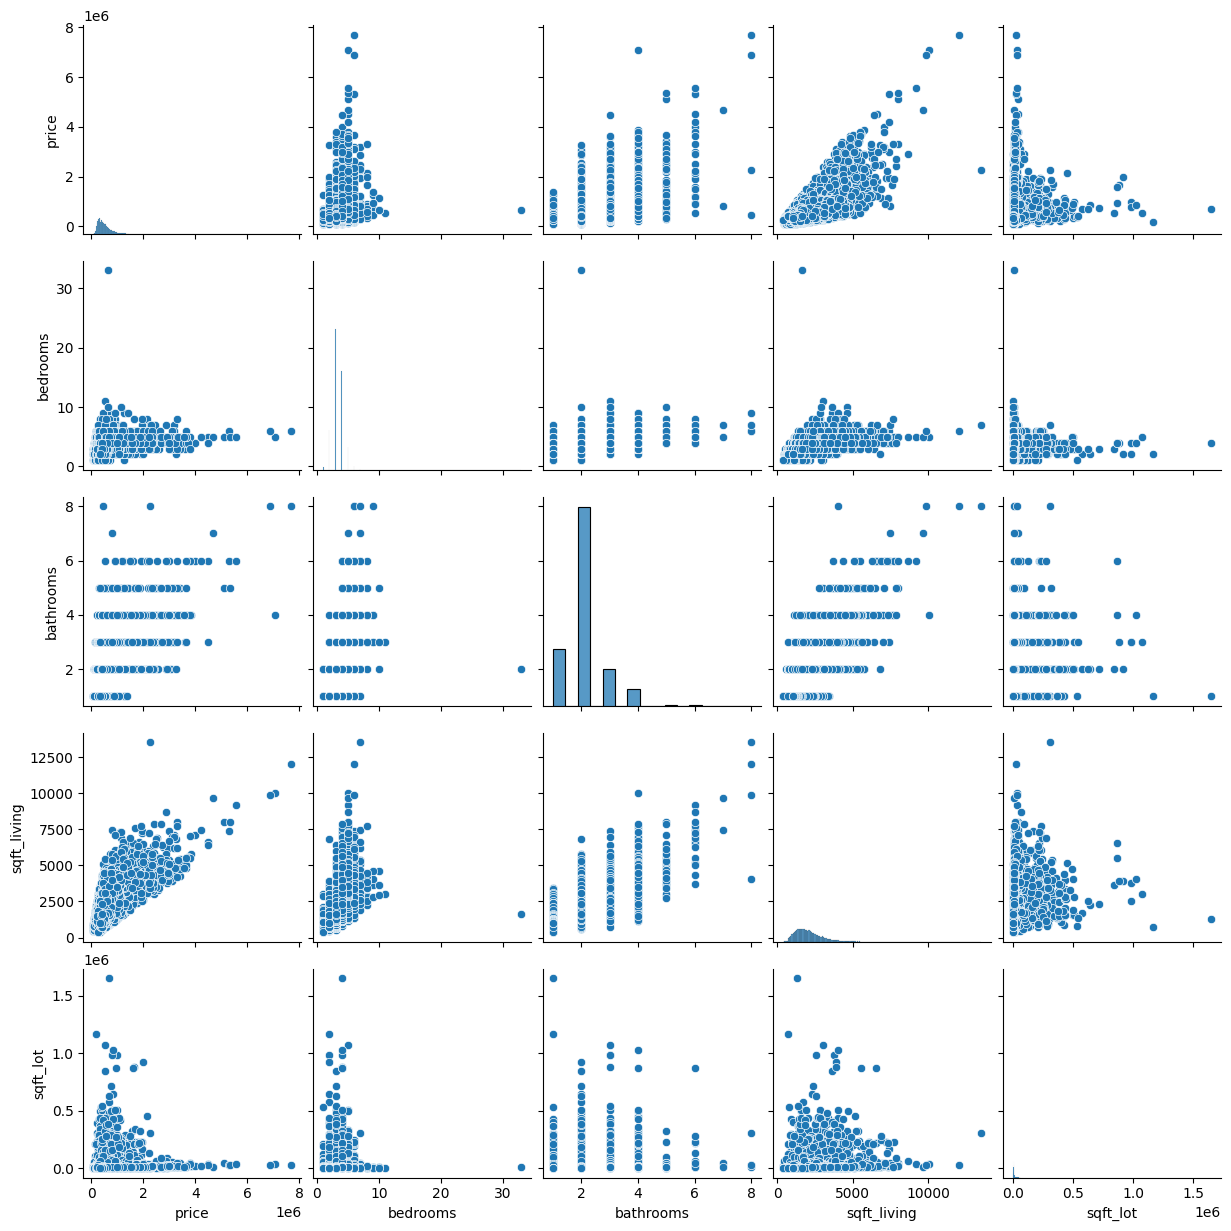

In [36]:
sns.pairplot(df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']])
plt.show()

In [37]:
from scipy.stats import chi2_contingency

# Chi-Square analysis for view and waterfront
view_waterfront = pd.crosstab(df['view'], df['waterfront'])
chi2_view_waterfront, p_view_waterfront, dof_view_waterfront, expected_view_waterfront = chi2_contingency(view_waterfront)
print(f"Chi-Square for view vs. waterfront: {chi2_view_waterfront}")
print(f"P-value for view vs. waterfront: {p_view_waterfront}")

# Chi-Square analysis for condition and grade
condition_grade = pd.crosstab(df['condition'], df['grade'])
chi2_condition_grade, p_condition_grade, dof_condition_grade, expected_condition_grade = chi2_contingency(condition_grade)
print(f"Chi-Square for condition vs. grade: {chi2_condition_grade}")
print(f"P-value for condition vs. grade: {p_condition_grade}")

Chi-Square for view vs. waterfront: 7565.4686526589285
P-value for view vs. waterfront: 0.0
Chi-Square for condition vs. grade: 1458.9378635179705
P-value for condition vs. grade: 3.3048229903019783e-280


# Q6 part 3. Calculate Pearson correlation, and plot their heatmap


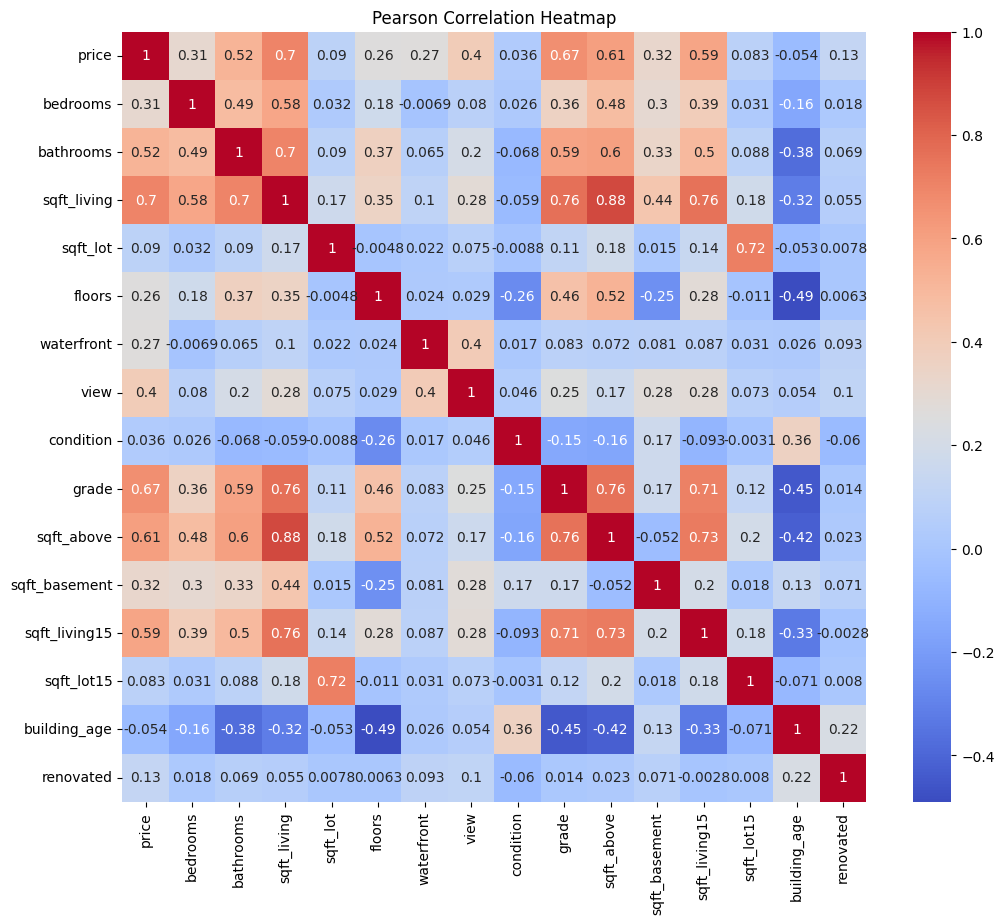

In [38]:
import seaborn as sns

# Calculate Pearson correlation
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Pearson Correlation Heatmap")
plt.show()

In [39]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,building_age,renovated
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,98178,1340,5650,59,0
1,538000.0,3,2.0,2570,7242,2.0,0,0,3,7,2170,400,98125,1690,7639,63,1
2,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,98028,2720,8062,82,0
3,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,98136,1360,5000,49,0
4,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,98074,1800,7503,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.0,1530,1131,3.0,0,0,3,8,1530,0,98103,1530,1509,5,0
21609,400000.0,4,2.0,2310,5813,2.0,0,0,3,8,2310,0,98146,1830,7200,1,0
21610,402101.0,2,1.0,1020,1350,2.0,0,0,3,7,1020,0,98144,1020,2007,5,0
21611,400000.0,3,2.0,1600,2388,2.0,0,0,3,8,1600,0,98027,1410,1287,11,0


# Q 8 :- One hot encode categorical variables (if any)

In [40]:
df=pd.get_dummies(df,drop_first=True)

In [41]:
x = df.drop("price", axis = 1)
y = df['price']

# SCALING

In [42]:
from scipy.stats import zscore

In [43]:
x=x.apply(zscore)

In [44]:
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,-0.403197,-1.406109,-0.980854,-0.228205,-0.915623,-0.087213,-0.305746,-0.630003,-0.561090,-0.735481,...,-0.116267,-0.051446,-0.145059,-0.109101,-0.112316,-0.109318,9.023083,-0.079613,-0.114619,-0.122063
1,-0.403197,-0.079789,0.533216,-0.189765,0.937334,-0.087213,-0.305746,-0.630003,-0.561090,0.460630,...,-0.116267,-0.051446,-0.145059,-0.109101,-0.112316,-0.109318,-0.110827,-0.079613,-0.114619,-0.122063
2,-1.482973,-1.406109,-1.427451,-0.123172,-0.915623,-0.087213,-0.305746,-0.630003,-1.413583,-1.230840,...,-0.116267,-0.051446,-0.145059,-0.109101,-0.112316,-0.109318,-0.110827,-0.079613,-0.114619,-0.122063
3,0.676579,1.246531,-0.131232,-0.243900,-0.915623,-0.087213,-0.305746,2.444269,-0.561090,-0.892546,...,-0.116267,-0.051446,-0.145059,-0.109101,-0.112316,-0.109318,-0.110827,-0.079613,-0.114619,-0.122063
4,-0.403197,-0.079789,-0.436225,-0.169531,-0.915623,-0.087213,-0.305746,-0.630003,0.291402,-0.131384,...,-0.116267,-0.051446,-0.145059,-0.109101,-0.112316,-0.109318,-0.110827,-0.079613,-0.114619,-0.122063


In [45]:
# # One-hot encode the 'zipcode' column
# encoded_zipcodes = pd.get_dummies(df['zipcode'], prefix='zipcode', drop_first=True)

# # Concatenate the encoded columns with the original DataFrame
# df_encoded = pd.concat([df, encoded_zipcodes], axis=1)

# # Drop the original 'zipcode' column
# df_encoded.drop(columns=['zipcode'], inplace=True)

# # Display the first few rows of the encoded DataFrame
# print(df_encoded.head())


In [46]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.0,2570,7242,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.0,770,10000,1.0,0,0,3,6,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.0,1530,1131,3.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0
21609,400000.0,4,2.0,2310,5813,2.0,0,0,3,8,...,1,0,0,0,0,0,0,0,0,0
21610,402101.0,2,1.0,1020,1350,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
21611,400000.0,3,2.0,1600,2388,2.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0


# Q 9 Split into train and test set

In [47]:
# # Define the features (X) and target (y)
# X = df_encoded.drop(columns=['price'])  # Features
# y = df_encoded['price']  # Target

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# # Display the shape of the resulting sets
# print("X_train shape:", X_train.shape)
# print("X_test shape:", X_test.shape)
# print("y_train shape:", y_train.shape)
# print("y_test shape:", y_test.shape)

# Q 10 Scale the variables

In [48]:
# # Initialize the StandardScaler
# sc = StandardScaler()

# # Fit the scaler on the training data and transform both training and testing data
# X_train_scaled = sc.fit_transform(X_train)
# X_test_scaled = sc.transform(X_test)

# Q11 Train multiple models like Linear regression, Decision Tree, Random Forest, SVR, etc.

# Linear regression

In [49]:
from sklearn.linear_model import LinearRegression


In [50]:
lin_r=LinearRegression()

In [51]:
lin_r.fit(X_train, Y_train)

LinearRegression()

In [52]:
lin_r.coef_

array([-2.60853265e+04,  1.80276104e+04,  1.13293142e+18,  1.03343320e+04,
       -2.30092612e+04,  5.65659609e+04,  4.22510216e+04,  1.59151262e+04,
        6.60783204e+04, -1.02140647e+18, -5.46297567e+17,  8.70680004e+03,
       -5.54089317e+03,  2.01644645e+04,  8.89890587e+03,  2.77277471e+03,
       -6.88598983e+02,  9.41228711e+04,  2.75735207e+04,  4.00220665e+04,
        2.02967493e+04,  2.83945660e+04,  5.12926523e+03,  1.18376644e+04,
        7.57205951e+03,  9.27600000e+03, -1.17898828e+03, -4.48712500e+03,
        9.16400000e+03,  2.32960000e+04,  1.40800000e+04,  2.64320000e+04,
        1.31400000e+03,  1.95143750e+03,  4.32359375e+02,  5.05995156e+04,
        3.23177734e+04,  6.11633398e+03,  6.65524844e+04,  5.72119810e+04,
        1.24445703e+03,  8.92357422e+03,  3.72222656e+04,  2.59509268e+04,
        4.95502637e+03,  1.34171348e+04,  4.59630469e+03,  1.23163750e+04,
        1.06049609e+04,  1.00398438e+02,  1.79597734e+04,  2.45840664e+04,
        2.04520703e+04,  

In [53]:
lin_r.intercept_

540079.7172950589

In [54]:
y_pred = lin_r.predict(X_test)

In [55]:
from sklearn import metrics

In [56]:
metrics.mean_absolute_error(Y_test, y_pred)

94799.55081327286

In [57]:
metrics.r2_score(Y_test, y_pred)

0.8057262978814287

# Decision Tree Classifier

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
DTC=DecisionTreeClassifier()

In [64]:
DTC.fit(X_train, Y_train)

DecisionTreeClassifier()

In [65]:
y_pred = DTC.predict(X_test)

In [67]:
metrics.accuracy_score(Y_test, y_pred)

0.007640657559620283

# Random Forest Classifier

In [70]:
from sklearn.ensemble import RandomForestClassifier


In [71]:
RFC=RandomForestClassifier()

In [72]:
RFC.fit(X_train, Y_train)

MemoryError: could not allocate 921174016 bytes

In [ ]:
y_pred = RFC.predict(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


In [ ]:
models = {"LogisticRegression":LogisticRegression(),
          "DecisionTreeClassifier":DecisionTreeClassifier(),
          "RandomForestClassifier":RandomForestClassifier()}